In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
bloodcells = cv.imread('images/blood-cells.png', 0)

In [3]:
print(bloodcells.shape)

(300, 500)


In [4]:
# Gaussian filter
hsize = 31
sigma = 1
output = cv.GaussianBlur(bloodcells, (hsize,hsize), sigma)

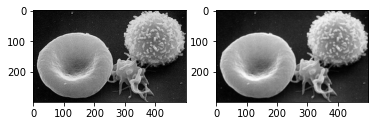

In [5]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(bloodcells, cmap='gray')
ax[1].imshow(output, cmap='gray')
plt.show()

In [6]:
# make gaussian kernel
k_size = 3
sigma = 1
center = k_size // 2
x, y = np.mgrid[0 - center : k_size - center, 0 - center : k_size - center]
g = (1 / (2 * np.pi * np.square(sigma))) * np.exp(-(np.square(x) + np.square(y)) / (2 * np.square(sigma)))
print(g)

[[0.05854983 0.09653235 0.05854983]
 [0.09653235 0.15915494 0.09653235]
 [0.05854983 0.09653235 0.05854983]]


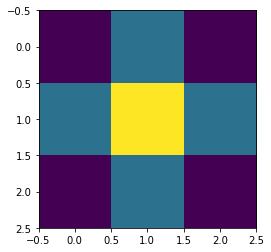

In [7]:
# plot the gaussian kernel
plt.imshow(g)
plt.show()

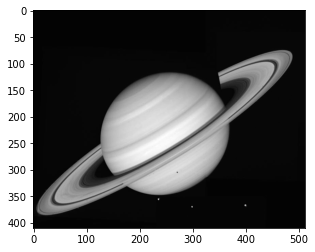

In [8]:
# load an image
saturn = cv.imread('images/saturn.png', 0)
plt.imshow(saturn, cmap='gray')
plt.show()

In [9]:
saturn_float = np.float32(saturn.copy())

254


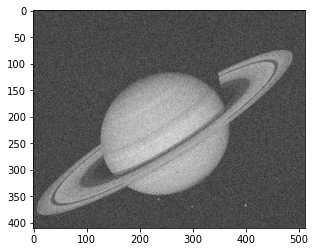

In [10]:
# add some noise
noise_sigma = 25
height, width = saturn.shape
noise = np.random.randn(height, width) * noise_sigma
noisy_img = saturn_float + noise
cv.normalize(noisy_img, noisy_img, 0, 255, cv.NORM_MINMAX, dtype=-1)
noisy_img = noisy_img.astype(np.uint8)
print(np.amax(noisy_img))
cv.imwrite('noisy_saturn.png', noisy_img)
plt.imshow(noisy_img, cmap='gray')
plt.show()

In [11]:
a = np.zeros((1,1), np.float64)
a[0, 0] = 255.00000000000003
b = a.astype(np.uint8)
print(b)

[[255]]


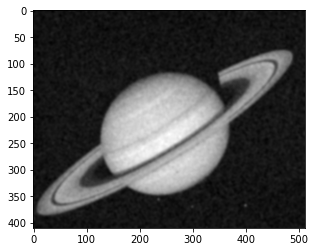

In [12]:
# create a Gaussian filter
filter_size = 11
filter_sigma = 2
smoothed = cv.GaussianBlur(noisy_img, (filter_size, filter_size), filter_sigma)
cv.imwrite('smoothed_noisy_saturn.png', smoothed)
plt.imshow(smoothed, cmap='gray')
plt.show()

In [13]:
size = 3
sigma = 1
kernel = cv.getGaussianKernel(size, sigma)
print(kernel.shape)

(3, 1)
